In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from functools import reduce

In [2]:
class LinearRegression:
    
    def __init__(self, n_features):
        #         self.W = np.random.normal(-1,1,(n_features,1)) #weights
        #         self.b = np.random.rand(1) #intercept
        self.W = self.randomNormal(-1,1,n_features,1) #weights
        self.b = self.randomArray(1) #intercept

    def randomArray(self, size):
        array = [random.uniform(0, 1) for _ in range(size)]
        return array
    
    def randomNormal(self, start, stop, rows, columns):
        matrix = []
        for i in range(rows):
            matrix.append([random.uniform(start, stop) for _ in range(columns)])
        return matrix;
    
    # determines if a value is a matrix vs a simple array|scalar
    def isNonEmptyMatrix(self, matrix):
        return len(matrix) > 0 and (type(matrix[0]) == list or type(matrix[0]) == np.ndarray)

    def scalarsubs(self, x, scalar):
        if self.isNonEmptyMatrix(x):
            matrix = [[item[0] - scalar] for i, item in enumerate(x)]
        else:
            matrix = [(item - scalar) for i, item in enumerate(x)]
        return matrix
    
    def scalarsum(self, x, scalar):
        matrix = [[item[0] + scalar[0]] for i, item in enumerate(x)]
        return matrix

    def multiply(self, x, y):
        matrix = [[item[0] * y[i][0]] for i, item in enumerate(x)]
        return matrix
    
    def matsubs(self, x, y):
        matrix = [[item[0] - y[i][0]] for i, item in enumerate(x)]
        return matrix
    
    def reducesum(self, x):
        sum = reduce(lambda a, b: a + b[0], x, 0)
        return sum
    
    def matmul(self, x, y):
        matrix = [[item[0] * y[0][0]] for i, item in enumerate(x)]
        return matrix
                
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W = self.scalarsubs(self.W, learning_rate*delta_W)
        self.b = self.scalarsubs(self.b, learning_rate*delta_b)   
    
    def derivatives(self, X, Y):
        xMul = self.matmul(X,self.W)
        xSum = self.scalarsum(xMul, self.b)
        xSubs = self.matsubs(xSum, Y)
        xMulMat = self.multiply(xSubs, X)
        
        wReduceSum = self.reducesum(xMulMat)
        dReduceSum = self.reducesum(xSubs)

        #partial derivative of cost w.r.t the weights
        delta_W = wReduceSum*2/len(X)
        #partial derivative of cost w.r.t the intercept
        delta_b = dReduceSum*2/len(X)
        
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1).tolist()
        Y = np.array(Y).reshape(-1,1).tolist()
        self.parameter_cache = []
        
        for i in range(epochs):
#             print(f'i={i} of {epochs}')
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            self.parameter_cache.append(np.array((self.W,self.b)))
            
        return self.W, self.b, self.parameter_cache

    def predict(self, X):
        xMul = self.matmul(np.array(X).reshape(-1,1), self.W)
        xSum = self.scalarsum(xMul, self.b)
        return xSum
    
#     # these methods go over the different structures from a `vector` perspective, but they are slower
#     def scalarsubs(self, x, scalar):
#         if self.isNonEmptyMatrix(x):
#             x = list(map(lambda item: self.scalarsubs(item, scalar), x))
#         else:
#             x = list(map(lambda item: item - scalar, x))
#         return x
#     def scalarsum(self, x, scalar):
#         if self.isNonEmptyMatrix(x):
#             x = list(map(lambda item: self.scalarsum(item, scalar), x))
#         else:
#             x = list(map(lambda item: item + scalar[0], x))
#         return x
#     def matmulslow(self, x, y):
#         if (self.isNonEmptyMatrix(x) and len(x[0]) != len(y)) or (not self.isNonEmptyMatrix(x) and len(x) != len(y)):
#             raise Exception('dimentions not compatible')
#         lineTotal = 0
#         resultArray = []
#         for i in range(len(x)):
#             if self.isNonEmptyMatrix(x):
#                 resultArray.append(self.matmul(x[i], y))
#             else:
#                 if self.isNonEmptyMatrix(y):
#                     resultArray.append(self.matmul(x, y[i]))
#                 else: 
#                     lineTotal += x[i] * y[i]
#         return lineTotal if resultArray == [] else resultArray
    

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
# df.head()

In [5]:
reg = LinearRegression(n_features=1)

In [6]:
# feature engineering?
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()
# x.shape, y.shape

i=0 of 50
i=1 of 50
i=2 of 50
i=3 of 50
i=4 of 50
i=5 of 50
i=6 of 50
i=7 of 50
i=8 of 50
i=9 of 50
i=10 of 50

<ipython-input-2-93548933c4c6>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.W,self.b)))



i=11 of 50
i=12 of 50
i=13 of 50
i=14 of 50
i=15 of 50
i=16 of 50
i=17 of 50
i=18 of 50
i=19 of 50
i=20 of 50
i=21 of 50
i=22 of 50
i=23 of 50
i=24 of 50
i=25 of 50
i=26 of 50
i=27 of 50
i=28 of 50
i=29 of 50
i=30 of 50
i=31 of 50
i=32 of 50
i=33 of 50
i=34 of 50
i=35 of 50
i=36 of 50
i=37 of 50
i=38 of 50
i=39 of 50
i=40 of 50
i=41 of 50
i=42 of 50
i=43 of 50
i=44 of 50
i=45 of 50
i=46 of 50
i=47 of 50
i=48 of 50
i=49 of 50
[0.9247329020502072] 1.880720645632358e-06


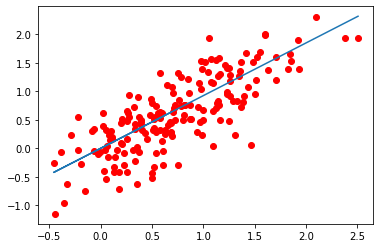

In [7]:
# params = reg.train(x, y, epochs=2, learning_rate=0.000001)
# params = reg.train(x, y, epochs=2, learning_rate=0.1)
params = reg.train(x, y, epochs=50, learning_rate=0.1)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [13]:
def foo(w, b, n):
    x = np.random.rand(n,1).tolist()
    # y = np.power(2, (w*x)) + b
    y = list(map(lambda item: pow(item[0]*w, 2)+b, x))
    return x, y

x, y = foo(9, 3, 2500)


In [14]:
reg = LinearRegression(n_features=1)

i=0 of 90
i=1 of 90
i=2 of 90
i=3 of 90
i=4 of 90
i=5 of 90
i=6 of 90
i=7 of 90
i=8 of 90
i=9 of 90
i=10 of 90
i=11 of 90
i=12 of 90
i=13 of 90
i=14 of 90
i=15 of 90
i=16 of 90
i=17 of 90
i=18 of 90
i=19 of 90
i=20 of 90
i=21 of 90
i=22 of 90
i=23 of 90
i=24 of 90
i=25 of 90
i=26 of 90
i=27 of 90
i=28 of 90
i=29 of 90
i=30 of 90
i=31 of 90
i=32 of 90
i=33 of 90
i=34 of 90
i=35 of 90
i=36 of 90
i=37 of 90
i=38 of 90
i=39 of 90
i=40 of 90
i=41 of 90
i=42 of 90
i=43 of 90


<ipython-input-2-93548933c4c6>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.W,self.b)))


i=44 of 90
i=45 of 90
i=46 of 90
i=47 of 90
i=48 of 90
i=49 of 90
i=50 of 90
i=51 of 90
i=52 of 90
i=53 of 90
i=54 of 90
i=55 of 90
i=56 of 90
i=57 of 90
i=58 of 90
i=59 of 90
i=60 of 90
i=61 of 90
i=62 of 90
i=63 of 90
i=64 of 90
i=65 of 90
i=66 of 90
i=67 of 90
i=68 of 90
i=69 of 90
i=70 of 90
i=71 of 90
i=72 of 90
i=73 of 90
i=74 of 90
i=75 of 90
i=76 of 90
i=77 of 90
i=78 of 90
i=79 of 90
i=80 of 90
i=81 of 90
i=82 of 90
i=83 of 90
i=84 of 90
i=85 of 90
i=86 of 90
i=87 of 90
i=88 of 90
i=89 of 90
[60.92451874753513] 0.25328340984567665


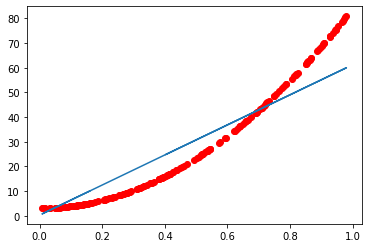

In [15]:
params = reg.train(x, y, epochs=90, learning_rate=0.1)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])